In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import spacy
nlp = spacy.load('en_core_web_lg')

In [3]:
# Get the path to the directory containing the text files
dir_path = Path('williams_four_key_hemingway_stories')

# Find all the text files in the directory and create a list of their paths
file_paths = list(dir_path.glob('*.txt'))

# Create an empty list to hold the data from each file
data = []

# Loop over each file and extract the file name (without extension) and data
for file_path in file_paths:
    # Get the file name (without extension)
    file_name = file_path.stem
    
    # Read in the file data
    with open(file_path, 'r') as f:
        file_data = f.read()
    
    # Append the file name and data to the data list
    data.append((file_name, file_data))
    
# Convert the data list to a pandas DataFrame
df = pd.DataFrame(data, columns=['filename', 'data'])

# Print the DataFrame
print(df)

                     filename  \
0  hills_like_white_elephants   
1          in_another_country   
2       old_man_at_the_bridge   
3                 the_killers   

                                                data  
0  Hills Like White Elephants\n\nTHE HILLS ACROS...  
1  In Another Country\n\nIN THE FALL THE WAR WAS...  
2  Old Man at the Bridge\n\nAN OLD MAN WITH STEE...  
3  The Killers\n\nTHE\n\nDOOR OF HENRY’S LUNCH-R...  


In [4]:
hills_nlp = nlp(data[0][1])

In [5]:
killers_nlp = nlp(data[1][1])
country_nlp = nlp(data[2][1])
bridge_nlp = nlp(data[3][1])

In [6]:
tagDict = {w.pos: w.pos_ for w in killers_nlp}
extendedTagDict = {w.pos: w.pos_ + "_" + w.tag_ for w in killers_nlp}

In [7]:
tagDict

{103: 'SPACE',
 85: 'ADP',
 90: 'DET',
 92: 'NOUN',
 96: 'PROPN',
 87: 'AUX',
 86: 'ADV',
 97: 'PUNCT',
 89: 'CCONJ',
 95: 'PRON',
 94: 'PART',
 100: 'VERB',
 84: 'ADJ',
 93: 'NUM',
 98: 'SCONJ',
 91: 'INTJ'}

In [8]:
extendedTagDict

{103: 'SPACE__SP',
 85: 'ADP_IN',
 90: 'DET_DT',
 92: 'NOUN_NN',
 96: 'PROPN_NNP',
 87: 'AUX_VBD',
 86: 'ADV_RB',
 97: 'PUNCT_.',
 89: 'CCONJ_CC',
 95: 'PRON_PRP',
 94: 'PART_RB',
 100: 'VERB_VBD',
 84: 'ADJ_JJ',
 93: 'NUM_CD',
 98: 'SCONJ_IN',
 91: 'INTJ_UH'}

In [9]:
hills_POS = pd.Series(hills_nlp.count_by(spacy.attrs.POS))/len(hills_nlp)
killers_POS = pd.Series(killers_nlp.count_by(spacy.attrs.POS))/len(killers_nlp)
country_POS = pd.Series(country_nlp.count_by(spacy.attrs.POS))/len(country_nlp)
bridge_POS = pd.Series(bridge_nlp.count_by(spacy.attrs.POS))/len(bridge_nlp)

*Nota bene*: the abbreviations for part of speech tags below (using spaCy) can be found [here](https://universaldependencies.org/u/pos/).

Text(0.5, 1.0, 'All the Different Kinds of Parts of Speech')

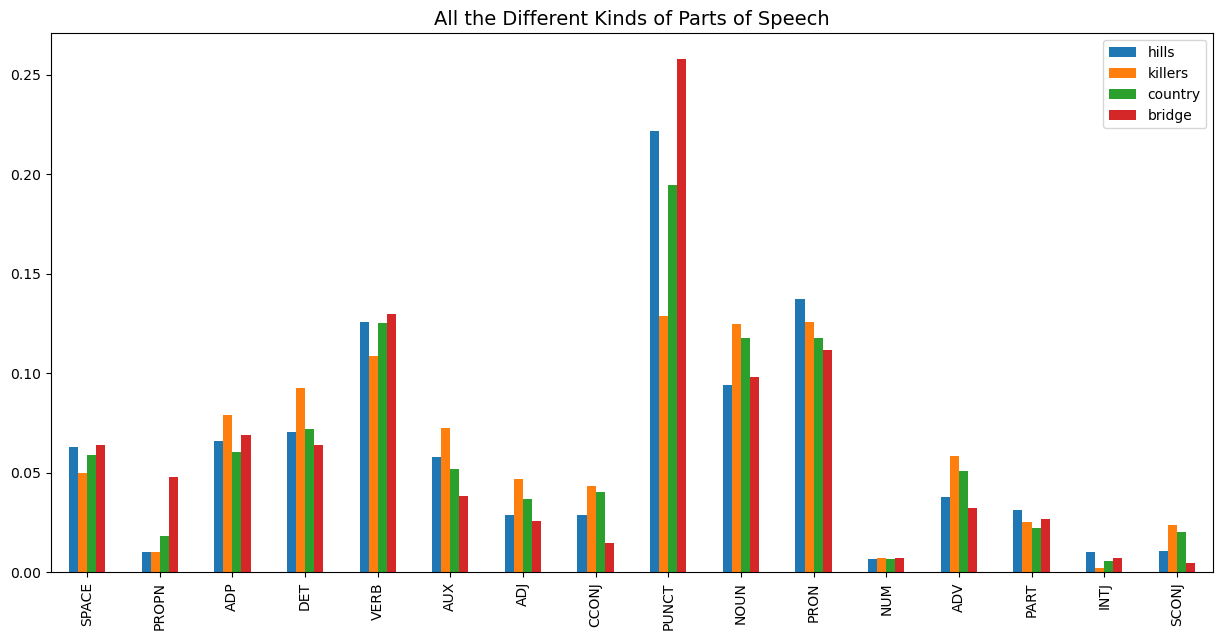

In [10]:
df = pd.DataFrame([hills_POS, killers_POS, country_POS, bridge_POS], index=['hills', 'killers', 'country', 'bridge'])
df.columns = [tagDict[column] for column in df.columns]
df.T.plot(kind='bar', figsize=(15, 7))
plt.title('All the Different Kinds of Parts of Speech', fontsize=14)

Text(0.5, 1.0, 'All the Different Kinds of Parts of Speech')

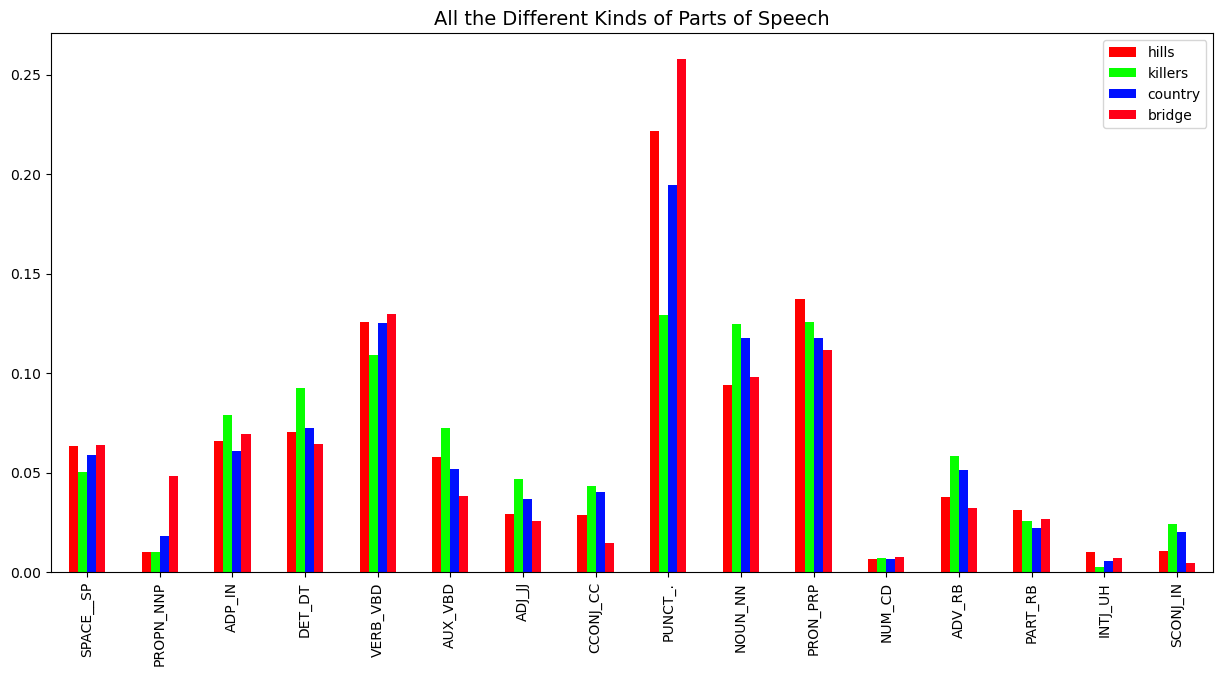

In [11]:
df = pd.DataFrame([hills_POS, killers_POS, country_POS, bridge_POS], index=['hills', 'killers', 'country', 'bridge'])
df.columns = [extendedTagDict[column] for column in df.columns]
df.T.plot(kind='bar', figsize=(15, 7), cmap='hsv')
plt.title('All the Different Kinds of Parts of Speech', fontsize=14)

Text(0.5, 1.0, 'All the Different Kinds of Parts of Speech')

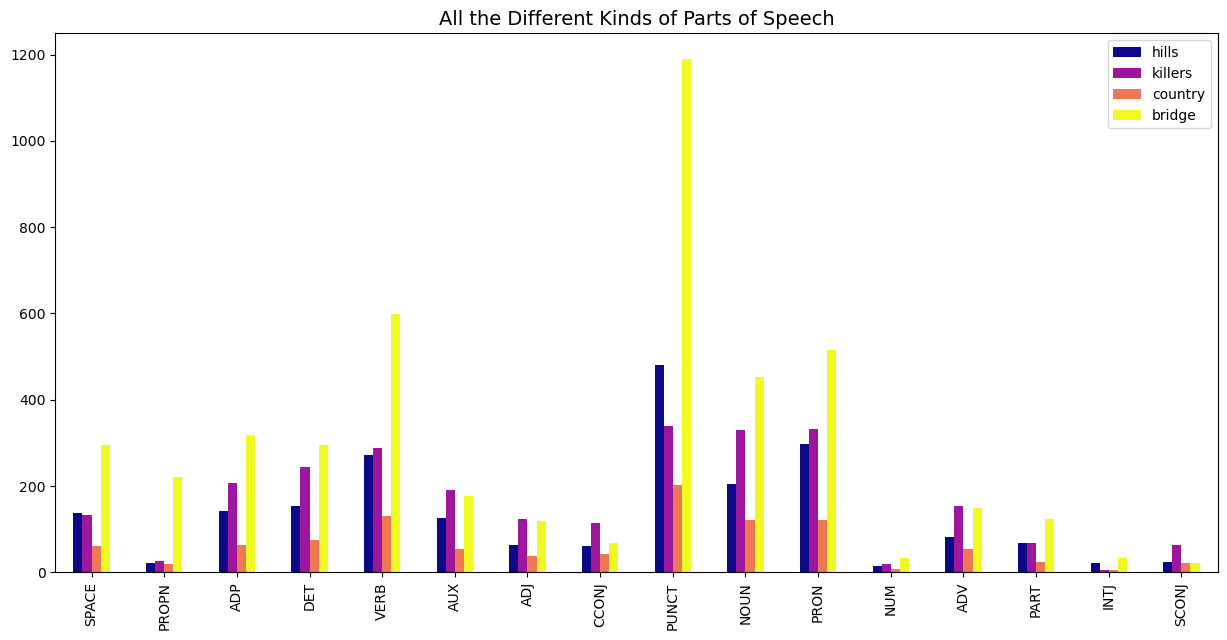

In [12]:
hills_POS = pd.Series(hills_nlp.count_by(spacy.attrs.POS))
killers_POS = pd.Series(killers_nlp.count_by(spacy.attrs.POS))
country_POS = pd.Series(country_nlp.count_by(spacy.attrs.POS))
bridge_POS = pd.Series(bridge_nlp.count_by(spacy.attrs.POS))
df = pd.DataFrame([hills_POS, killers_POS, country_POS, bridge_POS], index=['hills', 'killers', 'country', 'bridge'])
df.columns = [tagDict[column] for column in df.columns]
df.T.plot(kind='bar', figsize=(15, 7), cmap='plasma')
plt.title('All the Different Kinds of Parts of Speech', fontsize=14)

Text(0.5, 1.0, 'All the Different Kinds of Parts of Speech')

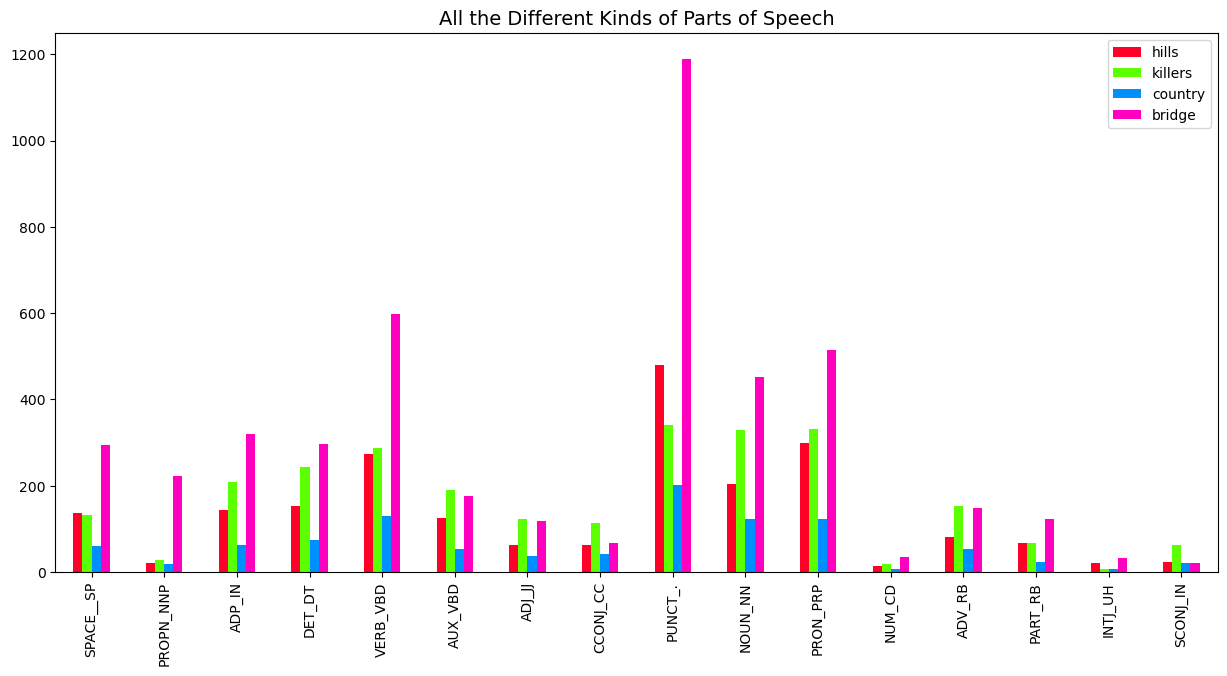

In [13]:
hills_POS = pd.Series(hills_nlp.count_by(spacy.attrs.POS))
killers_POS = pd.Series(killers_nlp.count_by(spacy.attrs.POS))
country_POS = pd.Series(country_nlp.count_by(spacy.attrs.POS))
bridge_POS = pd.Series(bridge_nlp.count_by(spacy.attrs.POS))
df = pd.DataFrame([hills_POS, killers_POS, country_POS, bridge_POS], index=['hills', 'killers', 'country', 'bridge'])
df.columns = [extendedTagDict[column] for column in df.columns]
df.T.plot(kind='bar', figsize=(15, 7), cmap='gist_rainbow')
plt.title('All the Different Kinds of Parts of Speech', fontsize=14)

In [14]:
test_string = "IN THE FALL THE WAR WAS ALWAYS there, but we did not go to it any more. It was cold in the fall in Milan and the dark came very early. Then the electric lights came on, and it was pleasant along the streets looking in the windows. There was much game hanging outside the shops, and the snow powdered in the fur of the foxes and the wind blew their tails. The deer hung stiff and heavy and empty, and small birds blew in the wind and the wind turned their feathers. It was a cold fall and the wind came down from the mountains."

In [17]:
from spacy import displacy
import random

doc = nlp(test_string)

pos_tags = list(set([token.pos_ for token in doc]))
color_scheme = {tag: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for tag in pos_tags}

# Generate HTML markup for the POS annotations with colored spans
html_markup = displacy.render(doc, style="dep", options={"colors": color_scheme})

# Output the markup as a string
print(html_markup)

None
